In [1]:
from utilities import PlotComp
from GEFSchwinger import GEF
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import pandas as pd
import numpy as np
import os
import sys

In [2]:
#models = [-1.0, 1.0, "mix"]

directory = 'Out/GEF_Beta25.0_SE'
alpha = 0.
Mpl = 1.
beta = 25.
M = 6e-6*Mpl
phi0 = 15.55*Mpl
dphidt0 = -np.sqrt(2/3)*M*Mpl
ini = {"phi":phi0, "dphi":dphidt0, "delta":1.0, "rhoChi":0.0}
ntr = 1

In [3]:
setups = ["Old", "Del1", "KDep"]
pars = ["N", "E","B","G","rhoChi"]
models = [1.0, -1.0, "mix"]
results = dict(zip(setups, [dict(zip([str(model) for model in models],
                                     [dict(zip(pars, [None for p in pars])) for m in models]))
                            for s in setups]))
for setup in setups:
    if setup == "Old":
        filesetup = ""
    elif setup == "KDep":
        filesetup = "_KDep_New_1it"
    elif setup == "Del1":
        filesetup = "_Del1" #Change this later on!
    else:
        print("This is not a valid Setup")
        sys.exit()
    for model in models:
        file = directory + str(model) + filesetup + ".dat"
        SE = model
        H = GEF(alpha, beta, Mpl, ini, M, ntr, SE, AltDamp=0, approx=True)
        H.LoadData(file)
        H.Unitless()
        for p in pars:
            if p=="N":
                results[setup][str(model)][p] = H.vals[p]
            elif p=="rhoChi":
                results[setup][str(model)][p] = H.vals[p]/H.vals["H"]**4
            elif p in ["E", "B", "G"]:
                results[setup][str(model)][p] = 0.5*abs(H.vals[p])/H.vals["H"]**4
models = [str(m) for m in models]

Already Unitless
Already Unitless
Already Unitless
Already Unitless
Already Unitless
Already Unitless
Already Unitless
Already Unitless
Already Unitless


In [4]:
def SetupAxis(down, up, nticks, scale):
    step = lambda up, down, ntick: abs(up-down)/(ntick-1)
    if scale=="log":
        ymin = np.log10(down)
        ymax = np.log10(up)
        stepsize = step(ymin, ymax, nticks)
        ticks = np.arange(ymin, ymax+stepsize/2, stepsize)
        for i in range(ticks.size):
            scale = int(ticks[i])
            ticks[i] = np.round(10**(ticks[i]-scale), 1)*10**(scale)
        ticksmin = 10**(np.arange(ymin+stepsize/2, ymax, stepsize))
        down = 10**(ymin-stepsize/4)
        up = 10**(ymax+stepsize/4)
    elif scale=="linear":
        ymin = down
        ymax = up
        stepsize = step(ymin, ymax, nticks)
        ticks = np.arange(ymin, ymax+stepsize/2, stepsize)
        ticksmin = np.arange(ymin+stepsize/2, ymax, stepsize)
        down = (ymin-stepsize/4)
        up = (ymax+stepsize/4)
    else:
        print(scale + " is not a valid choice")
        return None, None, None, None
    return down, up, ticks, ticksmin

def ConfigurePlot(ax, xdown, xup, ydown, yup, nxtick=5, nytick=5, xscale="linear", yscale="linear",
                  minorx=True, minory=True):
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)
    step = lambda up, down, ntick: (up-down)/(ntick-1)
    ydown, yup, yticks, yticksmin = SetupAxis(ydown, yup, nytick, yscale)
    xdown, xup, xticks, xticksmin = SetupAxis(xdown, xup, nxtick, xscale)
    #print(yticks)
    ax.set_ylim(ydown, yup)
    ax.set_xlim(xdown, xup)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    #if (yscale=="linear"):
    #    ax.set_yticks(yticks)
    if minorx:
        ax.set_xticks(xticksmin, minor=True)
    if minory:# and yscale=="linear":
        ax.set_yticks(yticksmin, minor=True)
    return
    

In [5]:
reds = ["darkred","orange","crimson"]
blues = ["midnightblue","deepskyblue","blue"]
greens = ["darkgreen","greenyellow","lime"]
magentas = ["indigo","hotpink","magenta"]
colors = [dict(zip(setups, reds)), 
          dict(zip(setups, blues)),
         dict(zip(setups, greens)), 
         dict(zip(setups, magentas))]
markers = [":", "--", "-"]
labelsM = ["magnetic picture", "electric picture", "mixed picture"]
labelsS = ["Schwinger damping on all scales $k$",
           "Schwinger damping on scales $k \leq k_h$",
           "Schwinger damping on scales $k \leq k_S$"]
styledic = {"color":dict(zip(pars[1:], colors)), "marker":dict(zip(models, markers))}
labeldic = dict(zip(setups + models, labelsS + labelsM))

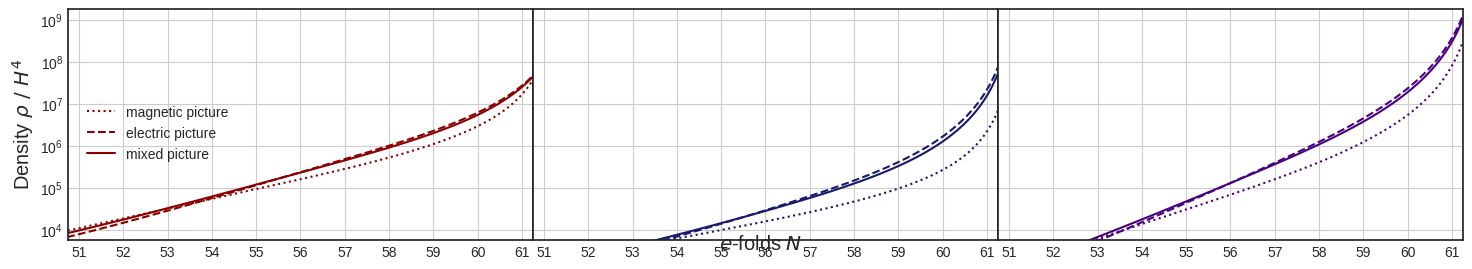

In [15]:
plt.style.use('seaborn-v0_8-white')

fig, ax = plt.subplots(1, 3, figsize=(18,3), sharex=True, sharey=True)

Nlim = [51, 61, 11]
#arr = [5, 15, 4]
arr = [1e4, 1e9, 6]
limdic = {"E":arr, "B":arr, "G":arr, "rhoChi":arr}
s = "Old"
partmp = ["E", "B", "rhoChi"]

for m in models:
    for i, p in enumerate(partmp):
        ax[i].plot(results[s][m]["N"], results[s][m][p],
                     color=styledic["color"][p][s], linestyle=styledic["marker"][m], label=labeldic[m])
        ConfigurePlot(ax[i], Nlim[0], Nlim[1], limdic[p][0], limdic[p][1],
                     nxtick=Nlim[2], nytick=limdic[p][2], yscale="log", minory=False)
        ax[i].tick_params(axis="both", which="both", direction="in")
        ax[i].xaxis.set_ticks_position("both")
        ax[i].yaxis.set_ticks_position("both")
        ax[i].grid(True)
plt.subplots_adjust(wspace=0, hspace=0)
fig.text(0.1, 0.5, r"Density $\rho \ / \ H^4$", rotation="vertical",
         horizontalalignment="center", verticalalignment="center",
        fontsize="x-large")
fig.text(0.51, 0.08, r"$e$-folds $N$", horizontalalignment="center", fontsize="x-large")
lines_labels = [ax[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax[0].legend(lines, labels, loc=(0.03, 0.32), frameon=False)#, loc=(0.085, 0.11))
plt.show()

/tmp/ipykernel_269304/2399048957.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


[]

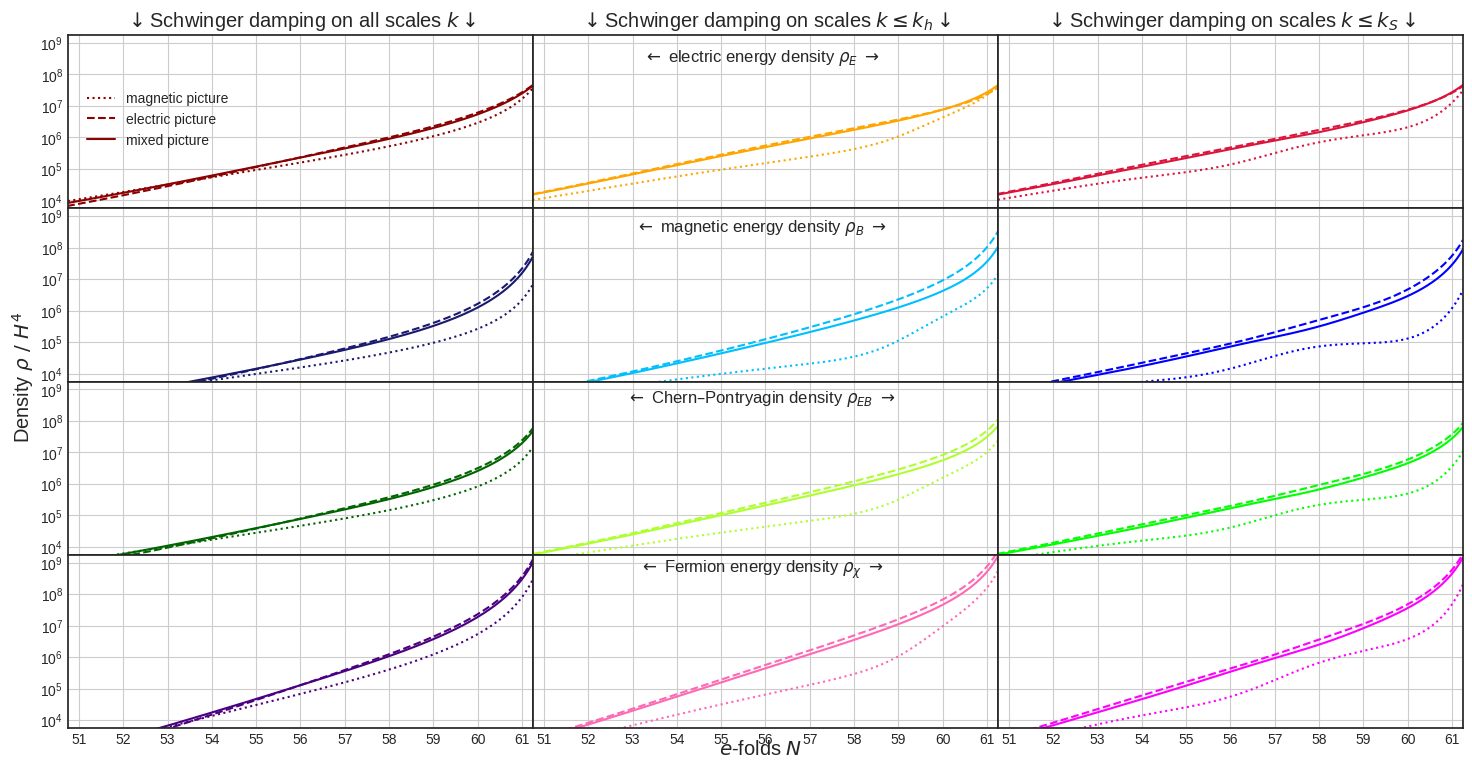

In [6]:
plt.style.use('seaborn-white')

fig, ax = plt.subplots(len(pars)-1, len(setups), figsize=(18,9), sharex=True, sharey=True)

Nlim = [51, 61, 11]
#arr = [5, 15, 4]
arr = [1e4, 1e9, 6]
limdic = {"E":arr, "B":arr, "G":arr, "rhoChi":arr}

for i in range(len(setups)):
    s= setups[i]
    for j in range(0, len(pars)-1):
        p = pars[j+1]
        for m in models:
            ax[j,i].plot(results[s][m]["N"], results[s][m][p],
                         color=styledic["color"][p][s], linestyle=styledic["marker"][m], label=labeldic[m])
            ConfigurePlot(ax[j,i], Nlim[0], Nlim[1], limdic[p][0], limdic[p][1],
                         nxtick=Nlim[2], nytick=limdic[p][2], yscale="log", minory=False)
            ax[j,i].tick_params(axis="both", which="both", direction="in")
            ax[j,i].xaxis.set_ticks_position("both")
            ax[j,i].yaxis.set_ticks_position("both")
            ax[j,i].grid(True)
    ax[0,i].set_title(r"$\downarrow$" + labeldic[s] + r"$\downarrow$", fontsize="x-large")

fig.text(0.51, 0.85, r"$\leftarrow$ electric energy density $\rho_E$ $\rightarrow$",
         horizontalalignment="center",
        fontsize="large")
fig.text(0.51, 0.661, r"$\leftarrow$ magnetic energy density $\rho_B$ $\rightarrow$",
         horizontalalignment="center",
        fontsize="large")
fig.text(0.51, 0.472, r"$\leftarrow$ Chern–Pontryagin density $\rho_{EB}$ $\rightarrow$",
         horizontalalignment="center",
        fontsize="large")
fig.text(0.51, 0.283, r"$\leftarrow$ Fermion energy density $\rho_\chi$ $\rightarrow$",
         horizontalalignment="center",
        fontsize="large")

plt.subplots_adjust(wspace=0, hspace=0)
fig.text(0.1, 0.5, r"Density $\rho \ / \ H^4$", rotation="vertical",
         horizontalalignment="center", verticalalignment="center",
        fontsize="x-large")
fig.text(0.51, 0.08, r"$e$-folds $N$", horizontalalignment="center", fontsize="x-large")
lines_labels = [ax[0,0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax[0,0].legend(lines, labels, loc=(0.03, 0.32), frameon=False)#, loc=(0.085, 0.11))
plt.plot()

[51, 61, 11]


[]

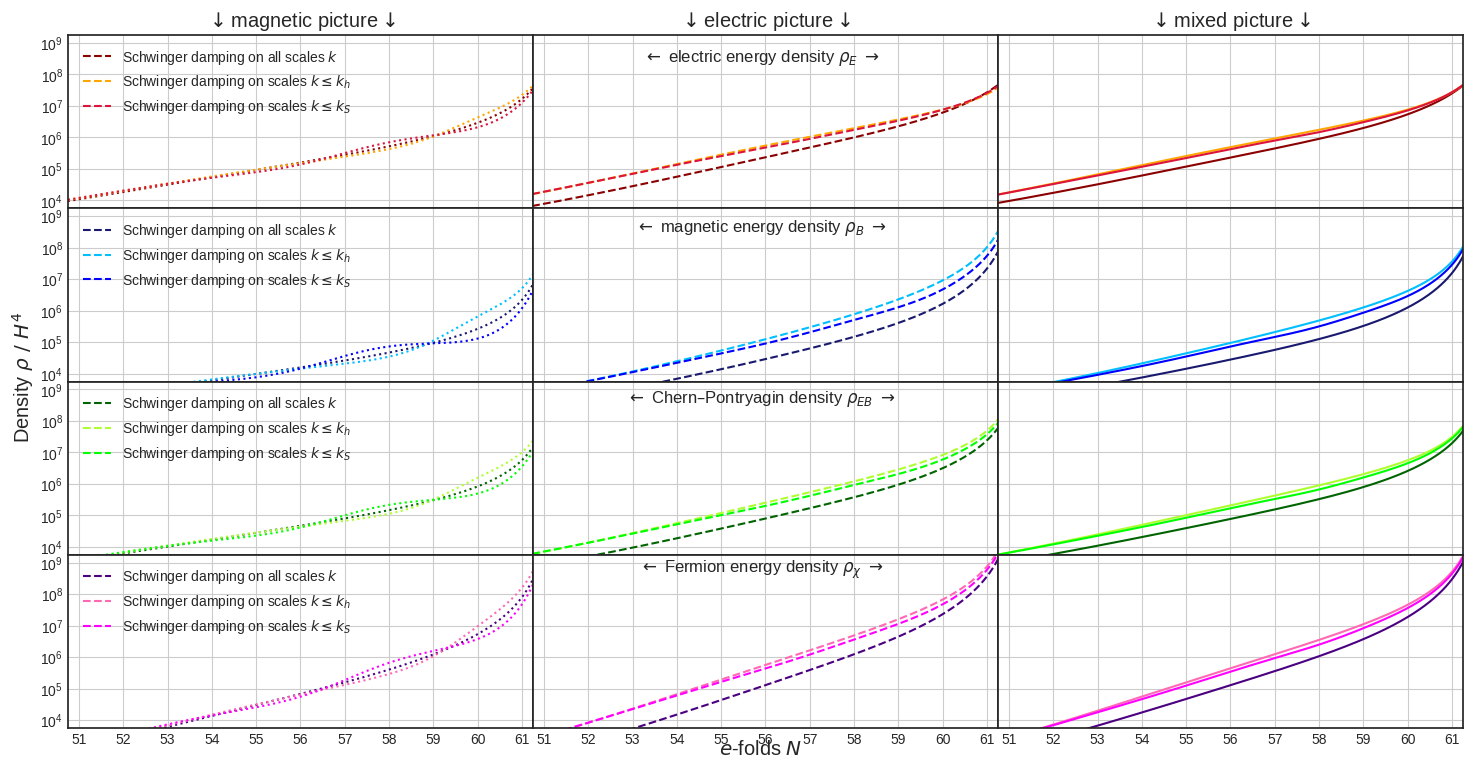

In [7]:
fig, ax = plt.subplots(len(pars)-1, len(models), figsize=(18,9), sharex=True, sharey=True)
print(Nlim)
for i in range(len(setups)):
    s= setups[i]
    for j in range(0, len(pars)-1):
        p = pars[j+1]
        for k in range(len(models)):
            m = models[k]
            ax[j,k].plot(results[s][m]["N"], results[s][m][p],
                         color=styledic["color"][p][s], linestyle=styledic["marker"][m], label=labeldic[s])
            ConfigurePlot(ax[j,k], Nlim[0], Nlim[1], limdic[p][0], limdic[p][1],
                         nxtick=Nlim[2], nytick=limdic[p][2], yscale="log", minory=False)
            ax[j,k].tick_params(axis="both", which="both", direction="in")
            ax[j,k].xaxis.set_ticks_position("both")
            ax[j,k].yaxis.set_ticks_position("both")
            ax[j,k].grid(True)
            ax[0,k].set_title(r"$\downarrow$" + labeldic[m] + r"$\downarrow$", fontsize="x-large")
        #lines_labels = [ax[j,2].get_legend_handles_labels()]
        lines_labels = [ax[j,1].get_legend_handles_labels()]
        lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
        ax[j,0].legend(lines, labels, loc=(0.02, 0.5), frameon=False)

            
fig.text(0.51, 0.85, r"$\leftarrow$ electric energy density $\rho_E$ $\rightarrow$",
         horizontalalignment="center",
        fontsize="large")
fig.text(0.51, 0.661, r"$\leftarrow$ magnetic energy density $\rho_B$ $\rightarrow$",
         horizontalalignment="center",
        fontsize="large")
fig.text(0.51, 0.472, r"$\leftarrow$ Chern–Pontryagin density $\rho_{EB}$ $\rightarrow$",
         horizontalalignment="center",
        fontsize="large")
fig.text(0.51, 0.283, r"$\leftarrow$ Fermion energy density $\rho_\chi$ $\rightarrow$",
         horizontalalignment="center",
        fontsize="large")

fig.text(0.51, 0.08, r"$e$-folds $N$", horizontalalignment="center", fontsize="x-large")

plt.subplots_adjust(hspace=0, wspace=0)
fig.text(0.1, 0.5, r"Density $\rho \ / \ H^4$", rotation="vertical",
         horizontalalignment="center", verticalalignment="center",
        fontsize="x-large")
#lines_labels = [ax[0,2].get_legend_handles_labels()]
lines_labels = [ax[0,1].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax[0,0].legend(lines, labels, loc=(0.02, 0.5), frameon=False)#, loc=(0.085, 0.11))
plt.plot()

[51, 61, 11]
[61.01322827]
Already Unitless
E
B
G


[]

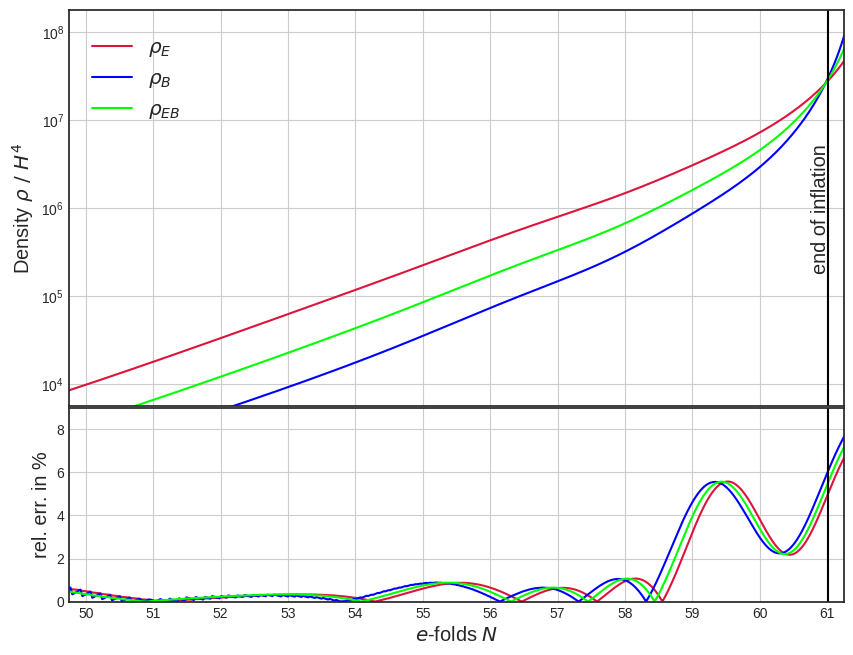

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(10,9), sharex=True)
print(Nlim)

setups = ["KDep"]
pars = ["N", "E","B","G"]
model = "mix"
resNerr = dict(zip(setups, [dict(zip(pars, [[[], []] for p in pars])) for s in setups]))
for setup in setups:
    if setup == "KDep":
        filesetup = "_KDep_New_1it"
        AltDamp=2
    elif setup == "Del1":
        filesetup = "_Del1"
        AltDamp=1
    else:
        print("This is not a valid Setup")
        sys.exit()
    file = directory + str(model) + filesetup + ".dat"
    SE = model
    H = GEF(alpha, beta, Mpl, ini, M, ntr, SE, AltDamp=AltDamp, approx=True)
    H.LoadData(file)
    Nend = H.EndOfInflation()[0]
    H.Unitless()
    data = pd.read_table("Modes/MbM_GFs__Beta25.0_SE"+model+filesetup+".dat", sep=",")
    MbMres = dict(zip(data.columns[1:],data.values[1:,1:].T))
    for p in pars:
        if p=="N":
            resNerr[setup][p][0] = H.vals[p]
            resNerr[setup][p][1] = MbMres[p]
        elif p in ["E", "B", "G"]:
            print(p)
            res = 0.5*abs(H.vals[p])/H.vals["H"]**4
            err = abs(1-MbMres[p]/CubicSpline(H.vals["N"], H.vals[p])(MbMres["N"]))
            resNerr[setup][p][0] = res
            resNerr[setup][p][1] = 100*err

linedic={"Del1": "--", "KDep":"-"}
labeldic={"E":r"$\rho_E$", "B":r"$\rho_B$", "G":r"$\rho_{EB}$"}
ax[1].set_box_aspect(0.25)
for i in range(2):
    for j in range(0, len(pars)-1):
        p = pars[j+1]
        for k in range(len(setups)):
            s = setups[k]
        
            ax[i].plot(resNerr[s]["N"][i], resNerr[s][p][i],
                     color=styledic["color"][p][setups[-1]], linestyle=linedic[s], label=labeldic[p])
    ax[i].tick_params(axis="both", which="both", direction="in")
    ax[i].xaxis.set_ticks_position("both")
    ax[i].yaxis.set_ticks_position("both")
    ax[i].grid(True)
ConfigurePlot(ax[0], 50, 61, 1e4, 1e8,
             nxtick=12, nytick=5, yscale="log", minory=False)
ax[1].set_ylim(0, 9)
ax[0].set_ylabel(r"Density $\rho \ / \ H^4$", fontsize="x-large")
ax[1].set_ylabel(r"rel. err. in %", fontsize="x-large")
ax[1].set_xlabel(r"$e$-folds $N$", fontsize="x-large")
ax[0].vlines(Nend, 1e3, 1e9, "k")
ax[1].vlines(Nend, 0, 10, "k")
ax[0].text(Nend-0.25, 2e5,"end of inflation", rotation=90, fontsize="x-large")

lines_labels = [ax[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax[0].legend(lines, labels, loc=(0.02, 0.7), frameon=False, fontsize="x-large")
plt.subplots_adjust(hspace=-0.25, wspace=0)
plt.savefig("Plots/ErrorPlotMixedKDep.pdf")
plt.plot()